In [4]:
import numpy as np
import matplotlib.pyplot as plt
import crosshair_definitions as ch

%matplotlib notebook

<IPython.core.display.Javascript object>


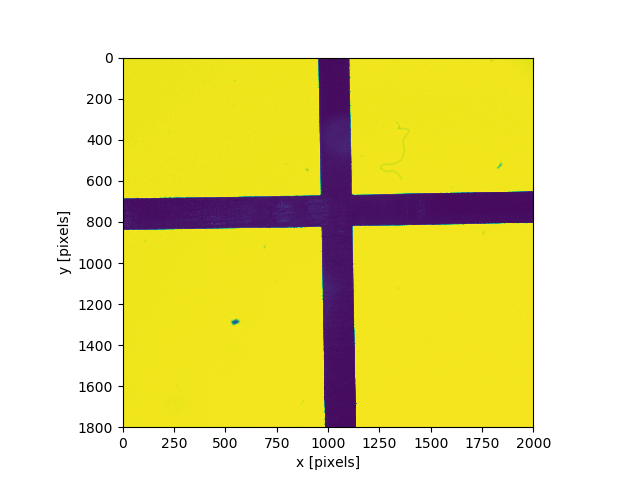

In [5]:
# import data
path = "ERIS_APW_ref_18_06_01_0284.JPG"

im = rgb2gray(imread(path))
# crop image and apply grayvalue threshold
im = ch.proccess_cut_img(im, xr=[200, 2000], yr=[1000, 3000], thresh=None)
plt.imshow(im, interpolation='nearest')
plt.xlabel("x [pixels]")
plt.ylabel("y [pixels]")

In [6]:
# cx = center x, cy = center y, zx = interpolation points x, l1(2)x = linear fit for edge 1(2), dfx = width of gaussian response fit  
cx, cy, zx, l1x, l2x, zy, l1y, l2y, dfx,dfy= ch.find_crosshair_center(im,initX=200, initY=200, dx=100, dy=100,step=50)



953 684


<IPython.core.display.Javascript object>


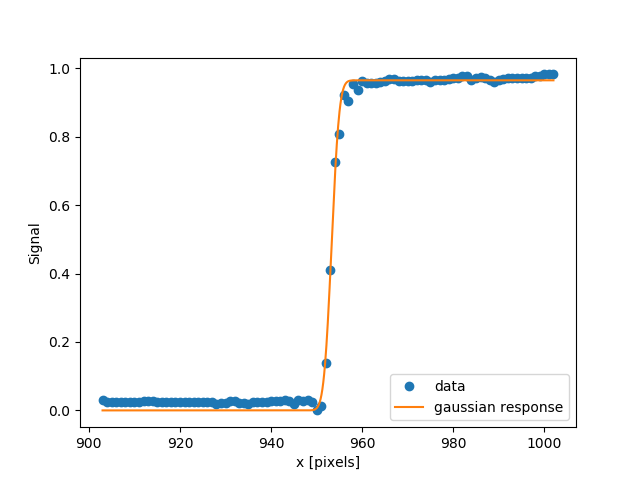

In [9]:
# fit of edge with gaussian response. Center is determined as the point where the gaussian response is half of the max
cutx = im[200, :]
cuty = im[:, 200]
x0 = ch.get_first_point(np.gradient(cutx))
y0 = ch.get_first_point(np.gradient(cuty))

dx, dy = 100, 100    
cutx = np.max(cutx) - cutx
cuty = np.max(cuty) - cuty

xdata = np.arange(x0-int(0.5*dx), x0+int(0.5*dx), 1)
ydata = np.arange(y0-int(0.5*dy), y0+int(0.5*dy), 1)
px = ch.fit_gaussian_response(xdata, cutx[xdata])
py = ch.fit_gaussian_response(ydata, cuty[ydata])

xs = np.linspace(xdata[0], xdata[-1],num=1000)
plt.plot(xdata, cutx[xdata], 'o', label='data')
plt.plot(xs, ch.gauss_response(xs,*px), label='gaussian response')
plt.xlabel("x [pixels]")
plt.ylabel("Signal")
plt.legend(loc='lower right')

<IPython.core.display.Javascript object>


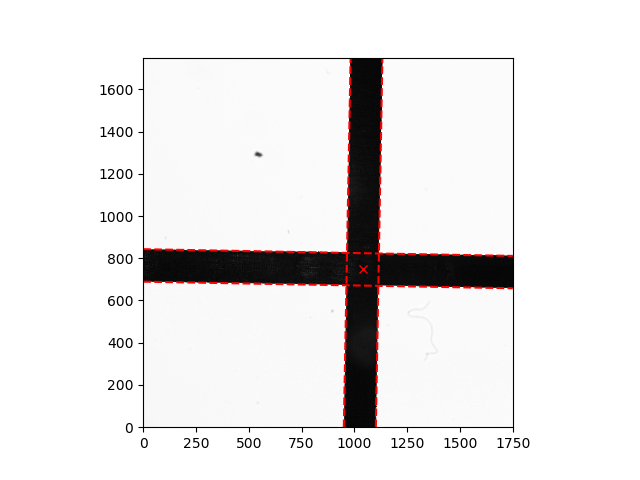

(0, 1750)

In [8]:
plt.imshow(im, interpolation='nearest', cmap='gray')
plt.plot(zy, l1y, 'r', zy, l2y, 'r', l1x, zx, 'r', l2x, zx, 'r', linestyle='--')
plt.plot(cy, cx, 'rx')
plt.ylim([0,1750])
plt.xlim([0,1750])